In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r'C:\Users\Kajal\Downloads\quora_data\train.csv.zip')

In [3]:
data.shape

(404290, 6)

In [4]:
data.head()

id  qid1  qid2                                          question1  \
0   0     1     2  What is the step by step guide to invest in sh...   
1   1     3     4  What is the story of Kohinoor (Koh-i-Noor) Dia...   
2   2     5     6  How can I increase the speed of my internet co...   
3   3     7     8  Why am I mentally very lonely? How can I solve...   
4   4     9    10  Which one dissolve in water quikly sugar, salt...   

                                           question2  is_duplicate  
0  What is the step by step guide to invest in sh...             0  
1  What would happen if the Indian government sto...             0  
2  How can Internet speed be increased by hacking...             0  
3  Find the remainder when [math]23^{24}[/math] i...             0  
4            Which fish would survive in salt water?             0

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [6]:
 data.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [7]:
data.duplicated().sum()

0

0    255027
1    149263
Name: is_duplicate, dtype: int64
0    63.080215
1    36.919785
Name: is_duplicate, dtype: float64


<Axes: >

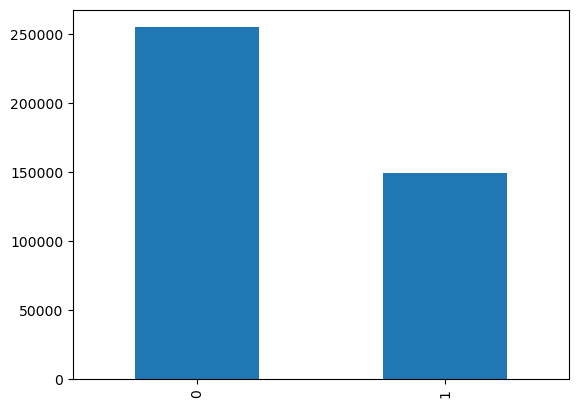

In [8]:
print(data['is_duplicate'].value_counts())
print((data['is_duplicate'].value_counts()/data['is_duplicate'].count())*100)
data['is_duplicate'].value_counts().plot(kind='bar')

36.92% of question pairs are duplicates and 63.08% of questions pair non-duplicate.

In [9]:
# Repeated questions

qid = pd.Series(data['qid1'].tolist() + data['qid2'].tolist())
print('Number of unique questions',np.unique(qid).shape[0])
x = qid.value_counts()>1
print('Number of questions getting repeated',x[x].shape[0])

Number of unique questions 537933
Number of questions getting repeated 111780


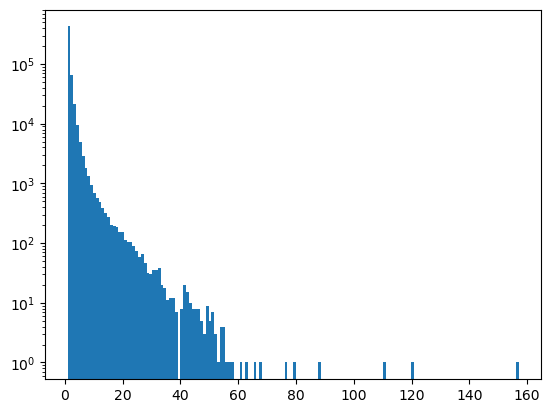

In [10]:
# Repeated questions histogram

plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()

In [11]:
data.shape

(404290, 6)

In [12]:
data.head()

id  qid1  qid2                                          question1  \
0   0     1     2  What is the step by step guide to invest in sh...   
1   1     3     4  What is the story of Kohinoor (Koh-i-Noor) Dia...   
2   2     5     6  How can I increase the speed of my internet co...   
3   3     7     8  Why am I mentally very lonely? How can I solve...   
4   4     9    10  Which one dissolve in water quikly sugar, salt...   

                                           question2  is_duplicate  
0  What is the step by step guide to invest in sh...             0  
1  What would happen if the Indian government sto...             0  
2  How can Internet speed be increased by hacking...             0  
3  Find the remainder when [math]23^{24}[/math] i...             0  
4            Which fish would survive in salt water?             0

In [13]:
new_data = data.sample(30000)
new_data.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [14]:
new_data.duplicated().sum()

0

In [15]:
ques_data = new_data[['question1','question2']]
ques_data.head()

question1  \
47399                 How do people get addicted to porn?   
180187  What is a good itinerary for 4 days in Goa wit...   
59367   Is there a way to remove myself from certain c...   
245808     How can I improve my pronunciation in English?   
179732  Who all are having there IIM Indore IPM interv...   

                                                question2  
47399            How do I lose my masturbation addiction?  
180187  What is the best travel itinerary for Goa in 4...  
59367    Is there a way to block certain topics on Quora?  
245808      What can I do to improve my English speaking?  
179732  Is a laptop required in the first year of IIM ...

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions = list(ques_data['question1']) + list(ques_data['question2'])
cv = CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [17]:
temp_data1 = pd.DataFrame(q1_arr, index= ques_data.index)
temp_data2 = pd.DataFrame(q2_arr, index= ques_data.index)
temp_data = pd.concat([temp_data1, temp_data2], axis=1)
temp_data.shape

(30000, 6000)

In [18]:
temp_data

0     1     2     3     4     5     6     7     8     9     ...  2990  \
47399      0     0     0     0     0     0     0     0     0     0  ...     0   
180187     0     0     0     0     0     0     0     0     0     0  ...     0   
59367      0     0     0     0     0     0     0     0     0     0  ...     0   
245808     0     0     0     0     0     0     0     0     0     0  ...     0   
179732     0     0     0     0     1     0     0     0     0     0  ...     0   
...      ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
2210       0     0     0     0     0     0     0     0     0     0  ...     0   
123621     0     0     0     0     0     0     0     0     0     1  ...     0   
250828     0     0     0     0     0     0     0     0     0     0  ...     0   
333199     0     0     0     0     0     0     0     0     0     0  ...     0   
243535     0     0     0     0     0     0     0     0     0     0  ...     0   

        2991  2992  2993  2994  2995  2996  2997  2998  2999  
47399      0     0     0     0     0     0     0     0     0  
180187     0     0     0     0     0     0     0     0     0  
59367      0     0     0     0     0     0     0     0     0  
245808     0     0     0     0     0     0     0     0     0  
179732     0     0     0     0     0     0     0     0     0  
...      ...   ...   ...   ...   ...   ...   ...   ...   ...  
2210       0     0     0     0     0     0     0     0     0  
123621     1     0     0     0     0     0     0     0     0  
250828     0     0     0     0     0     0     0     0     0  
333199     0     0     0     0     0     0     0     0     0  
243535     1     0     0     1     0     0     0     0     0  

[30000 rows x 6000 columns]

In [19]:
temp_data['is_duplicate'] = new_data['is_duplicate']
temp_data.head()

0  1  2  3  4  5  6  7  8  9  ...  2991  2992  2993  2994  2995  2996  \
47399   0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
180187  0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
59367   0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
245808  0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
179732  0  0  0  0  1  0  0  0  0  0  ...     0     0     0     0     0     0   

        2997  2998  2999  is_duplicate  
47399      0     0     0             0  
180187     0     0     0             1  
59367      0     0     0             1  
245808     0     0     0             1  
179732     0     0     0             0  

[5 rows x 6001 columns]

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(temp_data.iloc[:,0:-1].values,temp_data.iloc[:,-1].values,test_size=0.2,random_state=1)

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7416666666666667

In [22]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
accuracy_score(y_test,y_pred)

0.7281666666666666

In [23]:
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [24]:
new_data = data.sample(30000,random_state=2)

In [25]:
new_data.head()

id    qid1    qid2  \
398782  398782  496695  532029   
115086  115086  187729  187730   
327711  327711  454161  454162   
367788  367788  498109  491396   
151235  151235  237843   50930   

                                                question1  \
398782  What is the best marketing automation tool for...   
115086  I am poor but I want to invest. What should I do?   
327711  I am from India and live abroad. I met a guy f...   
367788  Why do so many people in the U.S. hate the sou...   
151235                Consequences of Bhopal gas tragedy?   

                                                question2  is_duplicate  
398782  What is the best marketing automation tool for...             1  
115086  I am quite poor and I want to be very rich. Wh...             0  
327711  T.I.E.T to Thapar University to Thapar Univers...             0  
367788  My boyfriend doesnt feel guilty when he hurts ...             0  
151235  What was the reason behind the Bhopal gas trag...             0

In [28]:
import re
from bs4 import BeautifulSoup

In [60]:
def preprocess(q):
    
    q = str(q).lower().strip()
    
    # Replace certain special characters with their string
    q = q.replace('%', ' percent')
    q = q.replace('$', ' dollar ')
    q = q.replace('₹', ' rupee ')
    q = q.replace('€', ' euro ')
    q = q.replace('@', ' at ')
    
    
    q = q.replace('[math]', '')
    
    # Replacing some numbers with string equivalents
    q = q.replace(',000,000,000 ', 'b ')
    q = q.replace(',000,000 ', 'm ')
    q = q.replace(',000 ', 'k ')
    q = re.sub(r'([0-9]+)000000000', r'\1b', q)
    q = re.sub(r'([0-9]+)000000', r'\1m', q)
    q = re.sub(r'([0-9]+)000', r'\1k', q)
    
    # Decontracting words
    # https://en.wikipedia.org/wiki/Wikipedia%3aList_of_English_contractions
    # https://stackoverflow.com/a/19794953
    contractions = { 
    "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

    q_decontracted = []

    for word in q.split():
        if word in contractions:
            word = contractions[word]

        q_decontracted.append(word)

    q = ' '.join(q_decontracted)
    q = q.replace("'ve", " have")
    q = q.replace("n't", " not")
    q = q.replace("'re", " are")
    q = q.replace("'ll", " will")
    
    # Removing HTML tags
    q = BeautifulSoup(q)
    q = q.get_text()
    
    # Remove punctuations
    pattern = re.compile('\W')
    q = re.sub(pattern, ' ', q).strip()

    
    return q
    

In [61]:
preprocess("I've already! wasn't <b>done</b>?")

'i have already  was not done'

In [62]:
new_data['question1'] = new_data['question1'].apply(preprocess)
new_data['question2'] = new_data['question2'].apply(preprocess)

In [63]:
new_data.head()

id    qid1    qid2  \
398782  398782  496695  532029   
115086  115086  187729  187730   
327711  327711  454161  454162   
367788  367788  498109  491396   
151235  151235  237843   50930   

                                                question1  \
398782  what is the best marketing automation tool for...   
115086    i am poor but i want to invest what should i do   
327711  i am from india and live abroad i met a guy fr...   
367788  why do so many people in the u s hate the sout...   
151235                 consequences of bhopal gas tragedy   

                                                question2  is_duplicate  \
398782  what is the best marketing automation tool for...             1   
115086  i am quite poor and i want to be very rich wha...             0   
327711  t i e t to thapar university to thapar univers...             0   
367788  my boyfriend doesnt feel guilty when he hurts ...             0   
151235  what was the reason behind the bhopal gas tragedy             0   

        q1_len  q2_len  q1_num_words  q2_num_words  ...   ctc_max  \
398782      75      76            13            13  ...  0.923070   
115086      48      56            13            16  ...  0.466664   
327711     104     119            28            21  ...  0.115384   
367788      58     145            14            32  ...  0.000000   
151235      34      49             5             9  ...  0.333330   

        last_word_eq  first_word_eq  abs_len_diff  mean_len  \
398782           1.0            1.0           0.0      13.0   
115086           1.0            1.0           3.0      13.5   
327711           0.0            0.0           6.0      23.0   
367788           0.0            0.0          17.0      21.5   
151235           1.0            0.0           4.0       7.0   

        longest_substr_ratio  fuzz_ratio  fuzz_partial_ratio  \
398782              0.855263          99                  99   
115086              0.224490          69                  67   
327711              0.047619          26                  29   
367788              0.050847          29                  41   
151235              0.542857          55                  70   

        token_sort_ratio  token_set_ratio  
398782                99               99  
115086                65               74  
327711                34               43  
367788                23               30  
151235                48               69  

[5 rows x 28 columns]

In [64]:
new_data['q1_len'] = new_data['question1'].str.len() 
new_data['q2_len'] = new_data['question2'].str.len()

In [65]:
new_data['q1_num_words'] = new_data['question1'].apply(lambda row: len(row.split(" ")))
new_data['q2_num_words'] = new_data['question2'].apply(lambda row: len(row.split(" ")))
new_data.head()

id    qid1    qid2  \
398782  398782  496695  532029   
115086  115086  187729  187730   
327711  327711  454161  454162   
367788  367788  498109  491396   
151235  151235  237843   50930   

                                                question1  \
398782  what is the best marketing automation tool for...   
115086    i am poor but i want to invest what should i do   
327711  i am from india and live abroad i met a guy fr...   
367788  why do so many people in the u s hate the sout...   
151235                 consequences of bhopal gas tragedy   

                                                question2  is_duplicate  \
398782  what is the best marketing automation tool for...             1   
115086  i am quite poor and i want to be very rich wha...             0   
327711  t i e t to thapar university to thapar univers...             0   
367788  my boyfriend doesnt feel guilty when he hurts ...             0   
151235  what was the reason behind the bhopal gas tragedy             0   

        q1_len  q2_len  q1_num_words  q2_num_words  ...   ctc_max  \
398782      75      76            13            13  ...  0.923070   
115086      47      55            12            15  ...  0.466664   
327711     102     118            26            20  ...  0.115384   
367788      57     143            13            30  ...  0.000000   
151235      34      49             5             9  ...  0.333330   

        last_word_eq  first_word_eq  abs_len_diff  mean_len  \
398782           1.0            1.0           0.0      13.0   
115086           1.0            1.0           3.0      13.5   
327711           0.0            0.0           6.0      23.0   
367788           0.0            0.0          17.0      21.5   
151235           1.0            0.0           4.0       7.0   

        longest_substr_ratio  fuzz_ratio  fuzz_partial_ratio  \
398782              0.855263          99                  99   
115086              0.224490          69                  67   
327711              0.047619          26                  29   
367788              0.050847          29                  41   
151235              0.542857          55                  70   

        token_sort_ratio  token_set_ratio  
398782                99               99  
115086                65               74  
327711                34               43  
367788                23               30  
151235                48               69  

[5 rows x 28 columns]

In [66]:
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return len(w1 & w2)

In [67]:
new_data['word_common'] = new_data.apply(common_words, axis=1)
new_data.head()

id    qid1    qid2  \
398782  398782  496695  532029   
115086  115086  187729  187730   
327711  327711  454161  454162   
367788  367788  498109  491396   
151235  151235  237843   50930   

                                                question1  \
398782  what is the best marketing automation tool for...   
115086    i am poor but i want to invest what should i do   
327711  i am from india and live abroad i met a guy fr...   
367788  why do so many people in the u s hate the sout...   
151235                 consequences of bhopal gas tragedy   

                                                question2  is_duplicate  \
398782  what is the best marketing automation tool for...             1   
115086  i am quite poor and i want to be very rich wha...             0   
327711  t i e t to thapar university to thapar univers...             0   
367788  my boyfriend doesnt feel guilty when he hurts ...             0   
151235  what was the reason behind the bhopal gas tragedy             0   

        q1_len  q2_len  q1_num_words  q2_num_words  ...   ctc_max  \
398782      75      76            13            13  ...  0.923070   
115086      47      55            12            15  ...  0.466664   
327711     102     118            26            20  ...  0.115384   
367788      57     143            13            30  ...  0.000000   
151235      34      49             5             9  ...  0.333330   

        last_word_eq  first_word_eq  abs_len_diff  mean_len  \
398782           1.0            1.0           0.0      13.0   
115086           1.0            1.0           3.0      13.5   
327711           0.0            0.0           6.0      23.0   
367788           0.0            0.0          17.0      21.5   
151235           1.0            0.0           4.0       7.0   

        longest_substr_ratio  fuzz_ratio  fuzz_partial_ratio  \
398782              0.855263          99                  99   
115086              0.224490          69                  67   
327711              0.047619          26                  29   
367788              0.050847          29                  41   
151235              0.542857          55                  70   

        token_sort_ratio  token_set_ratio  
398782                99               99  
115086                65               74  
327711                34               43  
367788                23               30  
151235                48               69  

[5 rows x 28 columns]

In [68]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return (len(w1) + len(w2))

In [69]:
new_data['word_total'] = new_data.apply(total_words, axis=1)
new_data.head()

id    qid1    qid2  \
398782  398782  496695  532029   
115086  115086  187729  187730   
327711  327711  454161  454162   
367788  367788  498109  491396   
151235  151235  237843   50930   

                                                question1  \
398782  what is the best marketing automation tool for...   
115086    i am poor but i want to invest what should i do   
327711  i am from india and live abroad i met a guy fr...   
367788  why do so many people in the u s hate the sout...   
151235                 consequences of bhopal gas tragedy   

                                                question2  is_duplicate  \
398782  what is the best marketing automation tool for...             1   
115086  i am quite poor and i want to be very rich wha...             0   
327711  t i e t to thapar university to thapar univers...             0   
367788  my boyfriend doesnt feel guilty when he hurts ...             0   
151235  what was the reason behind the bhopal gas tragedy             0   

        q1_len  q2_len  q1_num_words  q2_num_words  ...   ctc_max  \
398782      75      76            13            13  ...  0.923070   
115086      47      55            12            15  ...  0.466664   
327711     102     118            26            20  ...  0.115384   
367788      57     143            13            30  ...  0.000000   
151235      34      49             5             9  ...  0.333330   

        last_word_eq  first_word_eq  abs_len_diff  mean_len  \
398782           1.0            1.0           0.0      13.0   
115086           1.0            1.0           3.0      13.5   
327711           0.0            0.0           6.0      23.0   
367788           0.0            0.0          17.0      21.5   
151235           1.0            0.0           4.0       7.0   

        longest_substr_ratio  fuzz_ratio  fuzz_partial_ratio  \
398782              0.855263          99                  99   
115086              0.224490          69                  67   
327711              0.047619          26                  29   
367788              0.050847          29                  41   
151235              0.542857          55                  70   

        token_sort_ratio  token_set_ratio  
398782                99               99  
115086                65               74  
327711                34               43  
367788                23               30  
151235                48               69  

[5 rows x 28 columns]

In [70]:
new_data['word_share'] = round(new_data['word_common']/new_data['word_total'],2)
new_data.head()

id    qid1    qid2  \
398782  398782  496695  532029   
115086  115086  187729  187730   
327711  327711  454161  454162   
367788  367788  498109  491396   
151235  151235  237843   50930   

                                                question1  \
398782  what is the best marketing automation tool for...   
115086    i am poor but i want to invest what should i do   
327711  i am from india and live abroad i met a guy fr...   
367788  why do so many people in the u s hate the sout...   
151235                 consequences of bhopal gas tragedy   

                                                question2  is_duplicate  \
398782  what is the best marketing automation tool for...             1   
115086  i am quite poor and i want to be very rich wha...             0   
327711  t i e t to thapar university to thapar univers...             0   
367788  my boyfriend doesnt feel guilty when he hurts ...             0   
151235  what was the reason behind the bhopal gas tragedy             0   

        q1_len  q2_len  q1_num_words  q2_num_words  ...   ctc_max  \
398782      75      76            13            13  ...  0.923070   
115086      47      55            12            15  ...  0.466664   
327711     102     118            26            20  ...  0.115384   
367788      57     143            13            30  ...  0.000000   
151235      34      49             5             9  ...  0.333330   

        last_word_eq  first_word_eq  abs_len_diff  mean_len  \
398782           1.0            1.0           0.0      13.0   
115086           1.0            1.0           3.0      13.5   
327711           0.0            0.0           6.0      23.0   
367788           0.0            0.0          17.0      21.5   
151235           1.0            0.0           4.0       7.0   

        longest_substr_ratio  fuzz_ratio  fuzz_partial_ratio  \
398782              0.855263          99                  99   
115086              0.224490          69                  67   
327711              0.047619          26                  29   
367788              0.050847          29                  41   
151235              0.542857          55                  70   

        token_sort_ratio  token_set_ratio  
398782                99               99  
115086                65               74  
327711                34               43  
367788                23               30  
151235                48               69  

[5 rows x 28 columns]

In [71]:
# Advanced Features
from nltk.corpus import stopwords

def fetch_token_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    SAFE_DIV = 0.0001 

    STOP_WORDS = stopwords.words("english")
    
    token_features = [0.0]*8
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
    
    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
    
    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))
    
    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
    
    
    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    
    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    return token_features

In [72]:
token_features = new_data.apply(fetch_token_features, axis=1)

new_data["cwc_min"]       = list(map(lambda x: x[0], token_features))
new_data["cwc_max"]       = list(map(lambda x: x[1], token_features))
new_data["csc_min"]       = list(map(lambda x: x[2], token_features))
new_data["csc_max"]       = list(map(lambda x: x[3], token_features))
new_data["ctc_min"]       = list(map(lambda x: x[4], token_features))
new_data["ctc_max"]       = list(map(lambda x: x[5], token_features))
new_data["last_word_eq"]  = list(map(lambda x: x[6], token_features))
new_data["first_word_eq"] = list(map(lambda x: x[7], token_features))

In [73]:
new_data.head()

id    qid1    qid2  \
398782  398782  496695  532029   
115086  115086  187729  187730   
327711  327711  454161  454162   
367788  367788  498109  491396   
151235  151235  237843   50930   

                                                question1  \
398782  what is the best marketing automation tool for...   
115086    i am poor but i want to invest what should i do   
327711  i am from india and live abroad i met a guy fr...   
367788  why do so many people in the u s hate the sout...   
151235                 consequences of bhopal gas tragedy   

                                                question2  is_duplicate  \
398782  what is the best marketing automation tool for...             1   
115086  i am quite poor and i want to be very rich wha...             0   
327711  t i e t to thapar university to thapar univers...             0   
367788  my boyfriend doesnt feel guilty when he hurts ...             0   
151235  what was the reason behind the bhopal gas tragedy             0   

        q1_len  q2_len  q1_num_words  q2_num_words  ...   ctc_max  \
398782      75      76            13            13  ...  0.923070   
115086      47      55            12            15  ...  0.466664   
327711     102     118            26            20  ...  0.115384   
367788      57     143            13            30  ...  0.000000   
151235      34      49             5             9  ...  0.333330   

        last_word_eq  first_word_eq  abs_len_diff  mean_len  \
398782           1.0            1.0           0.0      13.0   
115086           1.0            1.0           3.0      13.5   
327711           0.0            0.0           6.0      23.0   
367788           0.0            0.0          17.0      21.5   
151235           1.0            0.0           4.0       7.0   

        longest_substr_ratio  fuzz_ratio  fuzz_partial_ratio  \
398782              0.855263          99                  99   
115086              0.224490          69                  67   
327711              0.047619          26                  29   
367788              0.050847          29                  41   
151235              0.542857          55                  70   

        token_sort_ratio  token_set_ratio  
398782                99               99  
115086                65               74  
327711                34               43  
367788                23               30  
151235                48               69  

[5 rows x 28 columns]

In [74]:
pip install Distance

Note: you may need to restart the kernel to use updated packages.


In [75]:
import distance
def fetch_length_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    length_features = [0.0]*3
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features
    
    # Absolute length features
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))
    
    #Average Token Length of both Questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens))/2
    
    strs = list(distance.lcsubstrings(q1, q2))
    length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)
    
    return length_features

In [76]:
length_features = new_data.apply(fetch_length_features, axis=1)

new_data['abs_len_diff'] = list(map(lambda x: x[0], length_features))
new_data['mean_len'] = list(map(lambda x: x[1], length_features))
new_data['longest_substr_ratio'] = list(map(lambda x: x[2], length_features))

In [77]:
new_data.head()

id    qid1    qid2  \
398782  398782  496695  532029   
115086  115086  187729  187730   
327711  327711  454161  454162   
367788  367788  498109  491396   
151235  151235  237843   50930   

                                                question1  \
398782  what is the best marketing automation tool for...   
115086    i am poor but i want to invest what should i do   
327711  i am from india and live abroad i met a guy fr...   
367788  why do so many people in the u s hate the sout...   
151235                 consequences of bhopal gas tragedy   

                                                question2  is_duplicate  \
398782  what is the best marketing automation tool for...             1   
115086  i am quite poor and i want to be very rich wha...             0   
327711  t i e t to thapar university to thapar univers...             0   
367788  my boyfriend doesnt feel guilty when he hurts ...             0   
151235  what was the reason behind the bhopal gas tragedy             0   

        q1_len  q2_len  q1_num_words  q2_num_words  ...   ctc_max  \
398782      75      76            13            13  ...  0.923070   
115086      47      55            12            15  ...  0.466664   
327711     102     118            26            20  ...  0.115384   
367788      57     143            13            30  ...  0.000000   
151235      34      49             5             9  ...  0.333330   

        last_word_eq  first_word_eq  abs_len_diff  mean_len  \
398782           1.0            1.0           0.0      13.0   
115086           1.0            1.0           3.0      13.5   
327711           0.0            0.0           6.0      23.0   
367788           0.0            0.0          17.0      21.5   
151235           1.0            0.0           4.0       7.0   

        longest_substr_ratio  fuzz_ratio  fuzz_partial_ratio  \
398782              0.855263          99                  99   
115086              0.229167          69                  67   
327711              0.048544          26                  29   
367788              0.051724          29                  41   
151235              0.542857          55                  70   

        token_sort_ratio  token_set_ratio  
398782                99               99  
115086                65               74  
327711                34               43  
367788                23               30  
151235                48               69  

[5 rows x 28 columns]

In [78]:
pip install fuzzywuzzy

Note: you may need to restart the kernel to use updated packages.


In [79]:
# Fuzzy Features
from fuzzywuzzy import fuzz

def fetch_fuzzy_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    fuzzy_features = [0.0]*4
    
    # fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features

In [80]:
fuzzy_features = new_data.apply(fetch_fuzzy_features, axis=1)

# Creating new feature columns for fuzzy features
new_data['fuzz_ratio'] = list(map(lambda x: x[0], fuzzy_features))
new_data['fuzz_partial_ratio'] = list(map(lambda x: x[1], fuzzy_features))
new_data['token_sort_ratio'] = list(map(lambda x: x[2], fuzzy_features))
new_data['token_set_ratio'] = list(map(lambda x: x[3], fuzzy_features))

In [81]:
print(new_data.shape)
new_data.head()

(30000, 28)


id    qid1    qid2  \
398782  398782  496695  532029   
115086  115086  187729  187730   
327711  327711  454161  454162   
367788  367788  498109  491396   
151235  151235  237843   50930   

                                                question1  \
398782  what is the best marketing automation tool for...   
115086    i am poor but i want to invest what should i do   
327711  i am from india and live abroad i met a guy fr...   
367788  why do so many people in the u s hate the sout...   
151235                 consequences of bhopal gas tragedy   

                                                question2  is_duplicate  \
398782  what is the best marketing automation tool for...             1   
115086  i am quite poor and i want to be very rich wha...             0   
327711  t i e t to thapar university to thapar univers...             0   
367788  my boyfriend doesnt feel guilty when he hurts ...             0   
151235  what was the reason behind the bhopal gas tragedy             0   

        q1_len  q2_len  q1_num_words  q2_num_words  ...   ctc_max  \
398782      75      76            13            13  ...  0.923070   
115086      47      55            12            15  ...  0.466664   
327711     102     118            26            20  ...  0.115384   
367788      57     143            13            30  ...  0.000000   
151235      34      49             5             9  ...  0.333330   

        last_word_eq  first_word_eq  abs_len_diff  mean_len  \
398782           1.0            1.0           0.0      13.0   
115086           1.0            1.0           3.0      13.5   
327711           0.0            0.0           6.0      23.0   
367788           0.0            0.0          17.0      21.5   
151235           1.0            0.0           4.0       7.0   

        longest_substr_ratio  fuzz_ratio  fuzz_partial_ratio  \
398782              0.855263          99                  99   
115086              0.229167          69                  66   
327711              0.048544          26                  30   
367788              0.051724          27                  46   
151235              0.542857          55                  70   

        token_sort_ratio  token_set_ratio  
398782                99               99  
115086                65               74  
327711                34               43  
367788                23               30  
151235                48               69  

[5 rows x 28 columns]

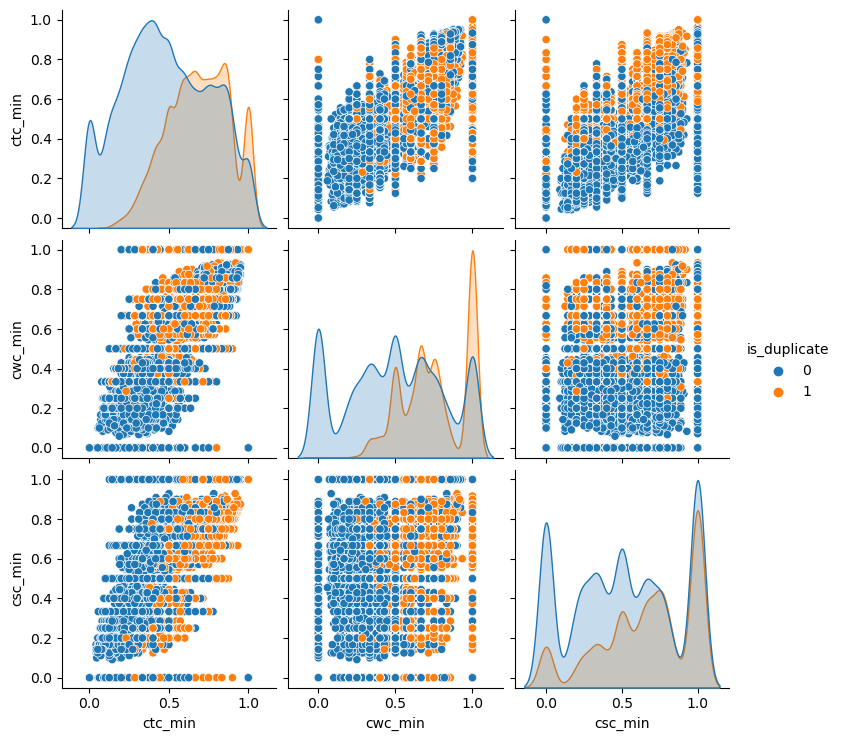

In [82]:
sns.pairplot(new_data[['ctc_min', 'cwc_min', 'csc_min', 'is_duplicate']],hue='is_duplicate')
#orange duplicate

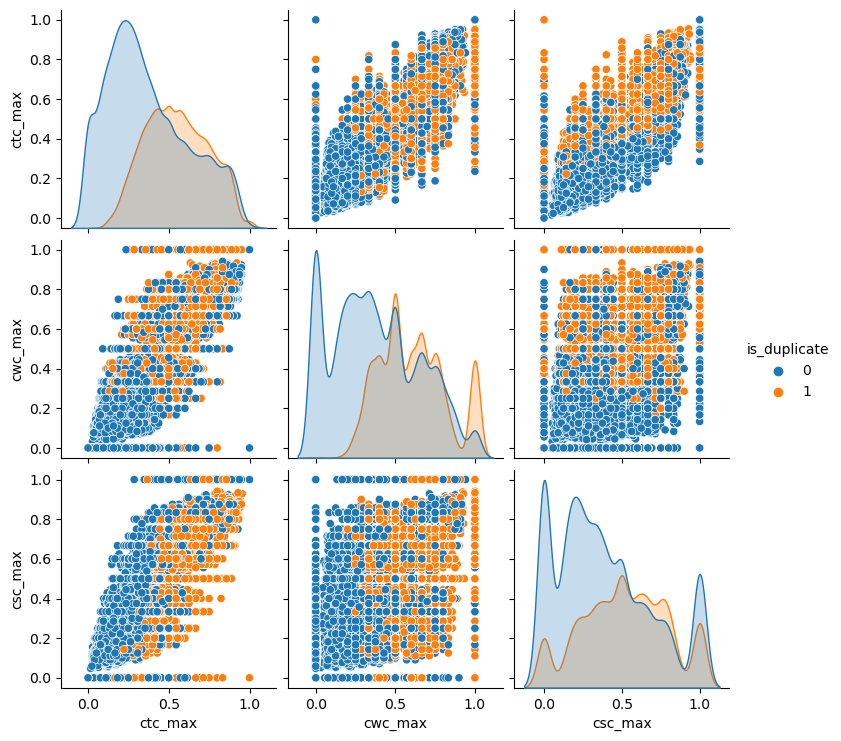

In [83]:
sns.pairplot(new_data[['ctc_max', 'cwc_max', 'csc_max', 'is_duplicate']],hue='is_duplicate')

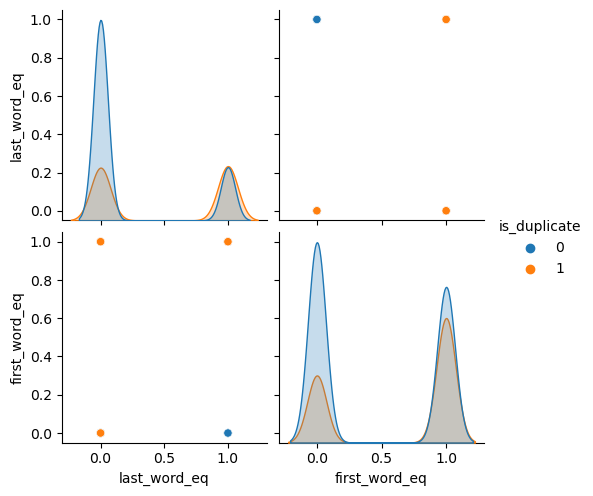

In [84]:
sns.pairplot(new_data[['last_word_eq', 'first_word_eq', 'is_duplicate']],hue='is_duplicate')

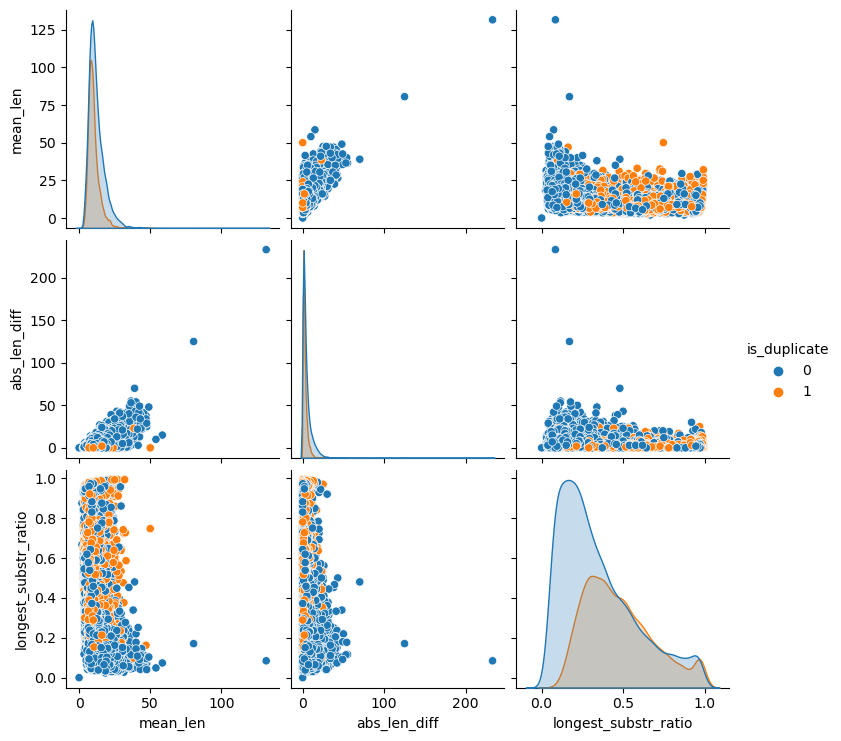

In [85]:
sns.pairplot(new_data[['mean_len', 'abs_len_diff','longest_substr_ratio', 'is_duplicate']],hue='is_duplicate')

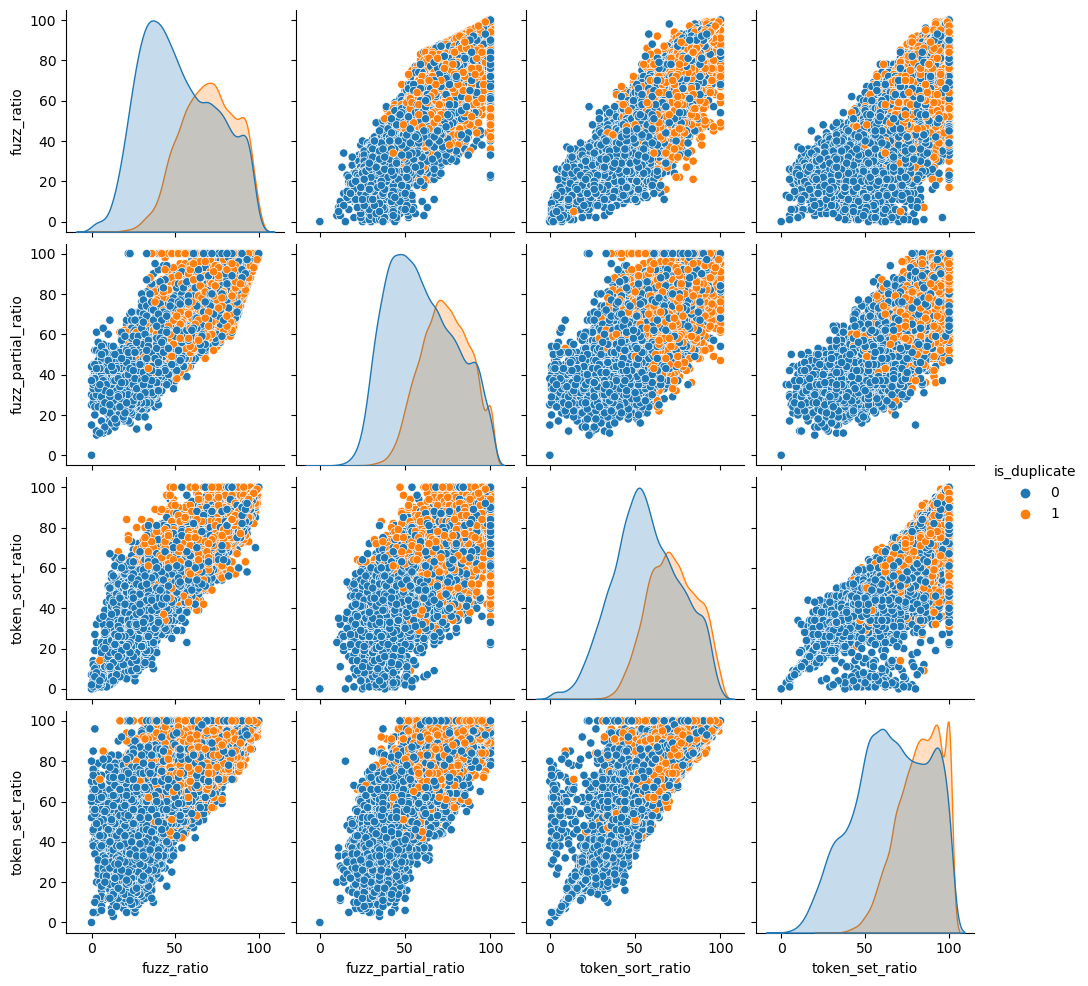

In [86]:
sns.pairplot(new_data[['fuzz_ratio', 'fuzz_partial_ratio','token_sort_ratio','token_set_ratio', 'is_duplicate']],hue='is_duplicate')

In [87]:
# Using TSNE for Dimentionality reduction for 15 Features(Generated after cleaning the data) to 3 dimention

from sklearn.preprocessing import MinMaxScaler

X = MinMaxScaler().fit_transform(new_data[['cwc_min', 'cwc_max', 'csc_min', 'csc_max' , 'ctc_min' , 'ctc_max' , 'last_word_eq', 'first_word_eq' , 'abs_len_diff' , 'mean_len' , 'token_set_ratio' , 'token_sort_ratio' ,  'fuzz_ratio' , 'fuzz_partial_ratio' , 'longest_substr_ratio']])
y = new_data['is_duplicate'].values

In [88]:
from sklearn.manifold import TSNE

tsne2d = TSNE(
    n_components=2,
    init='random', # pca
    random_state=101,
    method='barnes_hut',
    n_iter=1000,
    verbose=2,
    angle=0.5
).fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 30000 samples in 0.067s...
[t-SNE] Computed neighbors for 30000 samples in 6.477s...
[t-SNE] Computed conditional probabilities for sample 1000 / 30000
[t-SNE] Computed conditional probabilities for sample 2000 / 30000
[t-SNE] Computed conditional probabilities for sample 3000 / 30000
[t-SNE] Computed conditional probabilities for sample 4000 / 30000
[t-SNE] Computed conditional probabilities for sample 5000 / 30000
[t-SNE] Computed conditional probabilities for sample 6000 / 30000
[t-SNE] Computed conditional probabilities for sample 7000 / 30000
[t-SNE] Computed conditional probabilities for sample 8000 / 30000
[t-SNE] Computed conditional probabilities for sample 9000 / 30000
[t-SNE] Computed conditional probabilities for sample 10000 / 30000
[t-SNE] Computed conditional probabilities for sample 11000 / 30000
[t-SNE] Computed conditional probabilities for sample 12000 / 30000
[t-SNE] Computed conditional probabilities for sam

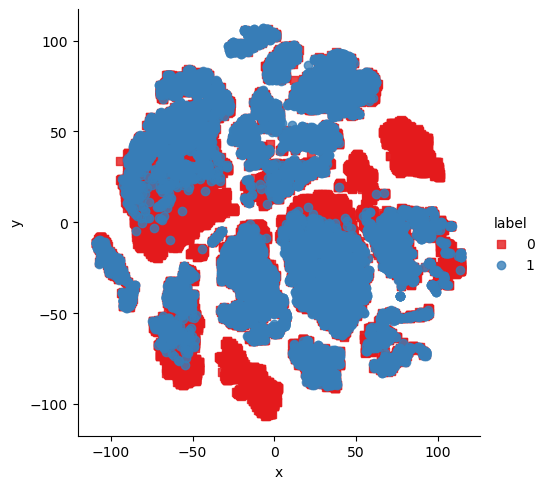

In [89]:
x_data = pd.DataFrame({'x':tsne2d[:,0], 'y':tsne2d[:,1] ,'label':y})

sns.lmplot(data=x_data, x='x', y='y', hue='label', fit_reg=False, height=5,palette="Set1",markers=['s','o'])

In [90]:
tsne3d = TSNE(
    n_components=3,
    init='random', # pca
    random_state=101,
    method='barnes_hut',
    n_iter=1000,
    verbose=2,
    angle=0.5
).fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 30000 samples in 0.094s...
[t-SNE] Computed neighbors for 30000 samples in 6.186s...
[t-SNE] Computed conditional probabilities for sample 1000 / 30000
[t-SNE] Computed conditional probabilities for sample 2000 / 30000
[t-SNE] Computed conditional probabilities for sample 3000 / 30000
[t-SNE] Computed conditional probabilities for sample 4000 / 30000
[t-SNE] Computed conditional probabilities for sample 5000 / 30000
[t-SNE] Computed conditional probabilities for sample 6000 / 30000
[t-SNE] Computed conditional probabilities for sample 7000 / 30000
[t-SNE] Computed conditional probabilities for sample 8000 / 30000
[t-SNE] Computed conditional probabilities for sample 9000 / 30000
[t-SNE] Computed conditional probabilities for sample 10000 / 30000
[t-SNE] Computed conditional probabilities for sample 11000 / 30000
[t-SNE] Computed conditional probabilities for sample 12000 / 30000
[t-SNE] Computed conditional probabilities for sam

In [91]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [92]:
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.offline as py
py.init_notebook_mode(connected=True)

trace1 = go.Scatter3d(
    x=tsne3d[:,0],
    y=tsne3d[:,1],
    z=tsne3d[:,2],
    mode='markers',
    marker=dict(
        sizemode='diameter',
        color = y,
        colorscale = 'Portland',
        colorbar = dict(title = 'duplicate'),
        line=dict(color='rgb(255, 255, 255)'),
        opacity=0.75
    )
)

data=[trace1]
layout=dict(height=800, width=800, title='3d embedding with engineered features')
fig=dict(data=data, layout=layout)
py.iplot(fig, filename='3DBubble')

In [93]:
ques_data = new_data[['question1','question2']]
ques_data.head()

question1  \
398782  what is the best marketing automation tool for...   
115086    i am poor but i want to invest what should i do   
327711  i am from india and live abroad i met a guy fr...   
367788  why do so many people in the u s hate the sout...   
151235                 consequences of bhopal gas tragedy   

                                                question2  
398782  what is the best marketing automation tool for...  
115086  i am quite poor and i want to be very rich wha...  
327711  t i e t to thapar university to thapar univers...  
367788  my boyfriend doesnt feel guilty when he hurts ...  
151235  what was the reason behind the bhopal gas tragedy

In [94]:
final_data = new_data.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_data.shape)
final_data.head()

(30000, 23)


is_duplicate  q1_len  q2_len  q1_num_words  q2_num_words  word_common  \
398782             1      75      76            13            13           12   
115086             0      47      55            12            15            7   
327711             0     102     118            26            20            3   
367788             0      57     143            13            30            0   
151235             0      34      49             5             9            3   

        word_total  word_share   cwc_min   cwc_max  ...   ctc_max  \
398782          26        0.46  0.874989  0.874989  ...  0.923070   
115086          22        0.32  0.666644  0.499988  ...  0.466664   
327711          36        0.08  0.000000  0.000000  ...  0.115384   
367788          32        0.00  0.000000  0.000000  ...  0.000000   
151235          13        0.23  0.749981  0.599988  ...  0.333330   

        last_word_eq  first_word_eq  abs_len_diff  mean_len  \
398782           1.0            1.0           0.0      13.0   
115086           1.0            1.0           3.0      13.5   
327711           0.0            0.0           6.0      23.0   
367788           0.0            0.0          17.0      21.5   
151235           1.0            0.0           4.0       7.0   

        longest_substr_ratio  fuzz_ratio  fuzz_partial_ratio  \
398782              0.855263          99                  99   
115086              0.229167          69                  66   
327711              0.048544          26                  30   
367788              0.051724          27                  46   
151235              0.542857          55                  70   

        token_sort_ratio  token_set_ratio  
398782                99               99  
115086                65               74  
327711                34               43  
367788                23               30  
151235                48               69  

[5 rows x 23 columns]

In [95]:
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions = list(ques_data['question1']) + list(ques_data['question2'])

cv = CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [96]:
temp_data1 = pd.DataFrame(q1_arr, index= ques_data.index)
temp_data2 = pd.DataFrame(q2_arr, index= ques_data.index)
temp_data = pd.concat([temp_data1, temp_data2], axis=1)
temp_data.shape

(30000, 6000)

In [97]:
final_data = pd.concat([final_data, temp_data], axis=1)
print(final_data.shape)
final_data.head()

(30000, 6023)


is_duplicate  q1_len  q2_len  q1_num_words  q2_num_words  word_common  \
398782             1      75      76            13            13           12   
115086             0      47      55            12            15            7   
327711             0     102     118            26            20            3   
367788             0      57     143            13            30            0   
151235             0      34      49             5             9            3   

        word_total  word_share   cwc_min   cwc_max  ...  2990  2991  2992  \
398782          26        0.46  0.874989  0.874989  ...     0     0     0   
115086          22        0.32  0.666644  0.499988  ...     0     0     0   
327711          36        0.08  0.000000  0.000000  ...     0     0     0   
367788          32        0.00  0.000000  0.000000  ...     0     0     0   
151235          13        0.23  0.749981  0.599988  ...     0     0     0   

        2993  2994  2995  2996  2997  2998  2999  
398782     0     0     0     0     0     0     0  
115086     0     0     0     0     0     0     0  
327711     0     0     0     0     0     0     0  
367788     1     0     0     0     0     0     0  
151235     0     0     0     0     0     0     0  

[5 rows x 6023 columns]

In [98]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_data.iloc[:,1:].values,final_data.iloc[:,0].values,test_size=0.2,random_state=1)

In [99]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7906666666666666

In [100]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred1 = xgb.predict(X_test)
accuracy_score(y_test,y_pred1)

0.7973333333333333